In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import NONE, VERTEX, BETA, ALPHA
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

parser = load_parser()

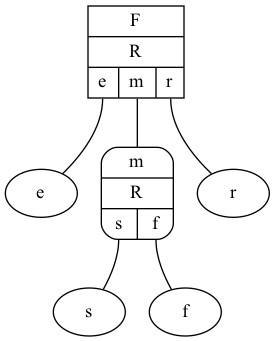

In [2]:
faces_hn = Hypernetwork()

compile_hn(faces_hn, parser, """
    F=<e, m={s, f}, r; phi_transform>
""")

draw_hn(faces_hn, fname="/tmp/faces2", view=False)
Image(filename='/tmp/faces2.png', width=200, height=1200)

In [3]:
def transformer(hn, t, vertex, betas):
    res_hn = Hypernetwork()
    hs = hn.hypernetwork[vertex]
    simplex = []
    
    for vert in hs.simplex:
        if hn.hypernetwork[vert].hstype == BETA:
            for b in betas:
                if b in hn.hypernetwork[vert].simplex:
                    simplex.append(b)
        
        else:
            simplex.append(vert)
    
    res_hn.insert(vertex, hstype=ALPHA, simplex=simplex, t=t)
    
    return res_hn

print(transformer(faces_hn, 1, "F", ["f"]))

F=<e, f, r; t_1>^N



In [4]:
hn = Hypernetwork()

compile_hn(hn, parser, """
    robot=<actuator, sensor, position; R_robot>
        actuator=<lm, rm>
            lm+ve=<lm; psi_motor>
            lm-ve=<lm; psi_motor>
            rm+ve=<rm; psi_motor>
            rm-ve=<rm; psi_motor>
        sensor=<gy, us, btn>
            gy+ve=<gy; psi_sensor>
            gy-ve=<gy; psi_sendor>
            us+ve=<us; psi_sensor>
            us-ve=<us; psi_sendor>
        position=<location, pointing; R>
#            deg-from-north=<pointing>
            pointing=<deg-from-north, turn>
                turn={no-turn, turn-left, turn-right}
            location=<x, y, move; R_location>
                move={no-move, forward, backward}

    movement={turn-left, turn-right, forward, backward}
        turn-left=<lm-ve, rm+ve, gy-ve; R_left; psi_turn>
        turn-right=<lm+ve, rm-ve, gy+ve; R_right; psi_turn>
        forward=<lm+ve, rm+ve, us-ve; R_straight; psi_move>
        backward=<lm-ve, rm-ve, us+ve; R_straight; psi_move>
        
    control=<robot, movement; R_control; psi-inv_move>
""")

print(transformer(hn, 1, "control", ["turn-right"]))
print(transformer(hn, 1, "pointing", ["turn-right"]))

control=<robot, turn-right; t_1>^N

pointing=<deg-from-north, turn-right; t_1>^N



In [5]:
def find_variants(hn, subject):
    res = []
    hs = hn.hypernetwork[subject]

    for part in hs.partOf:
        if hn.hypernetwork[part].hstype == BETA:
            for p in hn.hypernetwork[part].partOf:
                res.append(p)

    return res

subject = "turn-right"
for variant in find_variants(hn, subject):
    print(transformer(hn, 1, variant, [subject]))

control=<robot, turn-right; t_1>^N

pointing=<deg-from-north, turn-right; t_1>^N

